# Traffic Incidents for Jefferson County

In [1]:
import numpy as np
import pandas as pd
import csv
import zipfile as z
import sqlite3
import matplotlib.pyplot as plt
import os

os.getcwd()

'C:\\Users\\reeva\\Documents\\code\\github\\traffic_project'

### Load the CSV

In [2]:
# unzipping csv

zf = z.ZipFile("Data/JEFFERSON COUNTY_CRASH DATA_2010-2017.zip","r")
zf.extractall("Data")
zf.close()

In [3]:
# sqlite DB

db = sqlite3.connect("Data/jefferson_county_project.db")
df1 = pd.read_csv("Data/JEFFERSON COUNTY_CRASH DATA_2010-2017.csv", header=None)

df1.to_sql("jefferson", db, if_exists="replace")

def run_query(query):
    return pd.read_sql_query(query,db)

C:\Users\reeva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,4,6,10,11,12,14,24,25,26,27,28,30,33,35,37,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# delete big csv file

target_file = "Data/JEFFERSON COUNTY_CRASH DATA_2010-2017.csv"
  
if os.path.isfile(target_file): 
    os.remove(target_file) 
    print("File deleted") 
else: 
    print(f'"{target_file}" not found')

File deleted


### Table information via SQL

In [5]:
# table information

query = """
SELECT * FROM sqlite_master ORDER BY name;
"""

run_query(query)

,type,name,tbl_name,rootpage,sql
0,index,ix_jefferson_index,jefferson,5369,"CREATE INDEX ""ix_jefferson_index""ON ""jefferson..."
1,table,jefferson,jefferson,2,"CREATE TABLE ""jefferson"" (\n""index"" INTEGER,\n..."
2,table,jefferson_cleaned,jefferson_cleaned,20496,"CREATE TABLE jefferson_cleaned(\n date TEXT,\..."


In [6]:
# more table information

query_table = """
SELECT * FROM PRAGMA_TABLE_INFO('jefferson');
"""

# checking table information here
run_query(query)

,type,name,tbl_name,rootpage,sql
0,index,ix_jefferson_index,jefferson,5369,"CREATE INDEX ""ix_jefferson_index""ON ""jefferson..."
1,table,jefferson,jefferson,2,"CREATE TABLE ""jefferson"" (\n""index"" INTEGER,\n..."
2,table,jefferson_cleaned,jefferson_cleaned,20496,"CREATE TABLE jefferson_cleaned(\n date TEXT,\..."


In [7]:
# View whole table

query = """
SELECT * FROM jefferson;
"""

# uncomment to see, just hiding the huge page of sample data
#run_query(query)

In [8]:
# checking columns to see which ones I might use for graph

query = """
SELECT "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39" FROM jefferson WHERE "index" = 0 OR "index" = 1 LIMIT 10;
"""

# Columns: 13 "COLLISION DATE", 25 "MOTOR VEHICLES INVOLVED", 26 "KILLED", 27 "INJURED", 
#          29 "WEATHER", 31 "ROADWAY CONDITION", 32 "HIT & RUN INDICATOR" 38 "MANNER OF COLLISION"

run_query(query)

,29,30,31,32,33,34,35,36,37,38,39
0,WEATHER,ROADWAY CONDITION CODE,ROADWAY CONDITION,HIT & RUN INDICATOR,ROADWAY TYPE CODE,ROADWAY TYPE,DIRECTIONAL ANALYSIS CODE,DIRECTIONAL ANALYSIS,MANNER OF COLLISION CODE,MANNER OF COLLISION,ROADWAY CHARACTER CODE
1,CLOUDY,01,DRY,N,None,None,49,REAR END IN TRAFFIC LANES BOTH VEHICLES MOVING,05,REAR END,06


In [9]:
# lets get a look at that massive table with just the relevant information

view_total = 50  # change to see more

query = """
SELECT "13", "25", "26", "27", "29", "31", "32", "38" FROM jefferson LIMIT {};
""".format(view_total)

run_query(query)

,13,25,26,27,29,31,32,38
0,COLLISION DATE,MOTOR VEHICLES INVOLVED,KILLED,INJURED,WEATHER,ROADWAY CONDITION,HIT & RUN INDICATOR,MANNER OF COLLISION
1,2/8/2010,2,0,0,CLOUDY,DRY,N,REAR END
2,2/10/2010,2,0,0,CLOUDY,WET,N,ANGLE
3,2/26/2010,2,0,0,CLEAR,DRY,Y,REAR END
4,2/28/2010,2,0,0,CLOUDY,DRY,N,BACKING
5,2/1/2010,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION
6,3/19/2010,2,0,0,CLEAR,DRY,Y,SIDESWIPE-SAME DIRECTION
7,3/10/2010,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION
8,1/1/2010,1,0,0,CLEAR,DRY,Y,SIDESWIPE-SAME DIRECTION
9,1/11/2010,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION


In [10]:
# I wonder how many were hit and runs

query = """
SELECT COUNT (*) AS "Hit and Run Total" FROM jefferson WHERE "32" = "Y";
"""

run_query(query)

,Hit and Run Total
0,36235


In [11]:
# Lets tally all the collision types

query = """
SELECT "38" AS "Collision Type", COUNT("38") AS "Number" FROM jefferson GROUP BY "38" ORDER BY "Number" DESC LIMIT 8;
"""

run_query(query)

,Collision Type,Number
0,REAR END,92643
1,ANGLE,56158
2,SIDESWIPE-SAME DIRECTION,41200
3,SINGLE VEHICLE,31311
4,BACKING,13365
5,OPPOSING LEFT TURN,7074
6,SIDESWIPE-OPPOSITE DIRECTION,6676
7,HEAD ON,5005


In [12]:
# drop old table if exists 
c = db.cursor()

Drop_TableName = "jefferson_cleaned"

Drop_SQL = f"""DROP TABLE IF EXISTS {Drop_TableName};"""

c.execute(Drop_SQL)
c.close()

In [13]:
# create new table if not exists 
c = db.cursor()

Create_TableName = "jefferson_cleaned"

Create_SQL = f"""
CREATE TABLE IF NOT EXISTS {Create_TableName} AS
SELECT "13" AS "date", "25" AS "vehicles", "26" AS "fatality", "27" AS "injury",
"29" AS 'weather', "31" AS "condition", "32" AS "hit_and_run", "38" AS "collision_type"
FROM jefferson
WHERE "date" != "COLLISION DATE";
"""

c.execute(Create_SQL)
c.close()

traffic_cleaned = """SELECT * FROM jefferson_cleaned;"""

run_query(traffic_cleaned)

,date,vehicles,fatality,injury,weather,condition,hit_and_run,collision_type
0,2/8/2010,2,0,0,CLOUDY,DRY,N,REAR END
1,2/10/2010,2,0,0,CLOUDY,WET,N,ANGLE
2,2/26/2010,2,0,0,CLEAR,DRY,Y,REAR END
3,2/28/2010,2,0,0,CLOUDY,DRY,N,BACKING
4,2/1/2010,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION
...,...,...,...,...,...,...,...,...
255536,1/1/2018,2,0,0,CLEAR,DRY,Y,SIDESWIPE-SAME DIRECTION
255537,1/1/2018,3,0,0,CLEAR,DRY,N,ANGLE
255538,1/1/2018,2,0,0,CLEAR,DRY,N,REAR END
255539,1/1/2018,3,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION


In [14]:
# using pandas with the cleaned data table
df2 = pd.read_sql("""SELECT * FROM jefferson_cleaned""", db)
df2.head(-10)

,date,vehicles,fatality,injury,weather,condition,hit_and_run,collision_type
0,2/8/2010,2,0,0,CLOUDY,DRY,N,REAR END
1,2/10/2010,2,0,0,CLOUDY,WET,N,ANGLE
2,2/26/2010,2,0,0,CLEAR,DRY,Y,REAR END
3,2/28/2010,2,0,0,CLOUDY,DRY,N,BACKING
4,2/1/2010,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION
...,...,...,...,...,...,...,...,...
255526,1/1/2018,2,0,1,CLEAR,DRY,N,OPPOSING LEFT TURN
255527,1/1/2018,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION
255528,1/1/2018,4,0,0,CLEAR,DRY,Y,None
255529,1/1/2018,2,0,0,CLEAR,DRY,N,SIDESWIPE-SAME DIRECTION


In [15]:
df2.date = pd.to_datetime(df2.date)
df2.sort_values(by='date', inplace=True)
df2.reset_index(drop=True, inplace=True)
#df2.head(50)

In [16]:
# time to make this date data close to the other graph I've made
# Quarter 2010 Q1 to 2017 Q3

traffic_incidents = []
incident = 0
quarter_date = pd.Timestamp('2010-04-01')

for count in range (0, len(df2.date)):
    if df2.date[count] < quarter_date:
        incident += 1
    else:
        traffic_incidents.append(incident)
        incident = 0
        quarter_date += pd.DateOffset(months=3)
        

        
#traffic_incidents

In [17]:
# populating the labels array

x_labels = []
year = 2010
quarter = 1

for count in range(0, len(traffic_incidents)):
    if quarter == 1:
        x_labels.append("{} - Q{}".format(year, quarter))
    elif quarter < 4:
        x_labels.append("- Q{}".format(quarter))
    else:
        x_labels.append("- Q{}".format(quarter))
        year += 1
        quarter = 0
    quarter += 1
#x_labels

<Figure size 864x648 with 0 Axes>

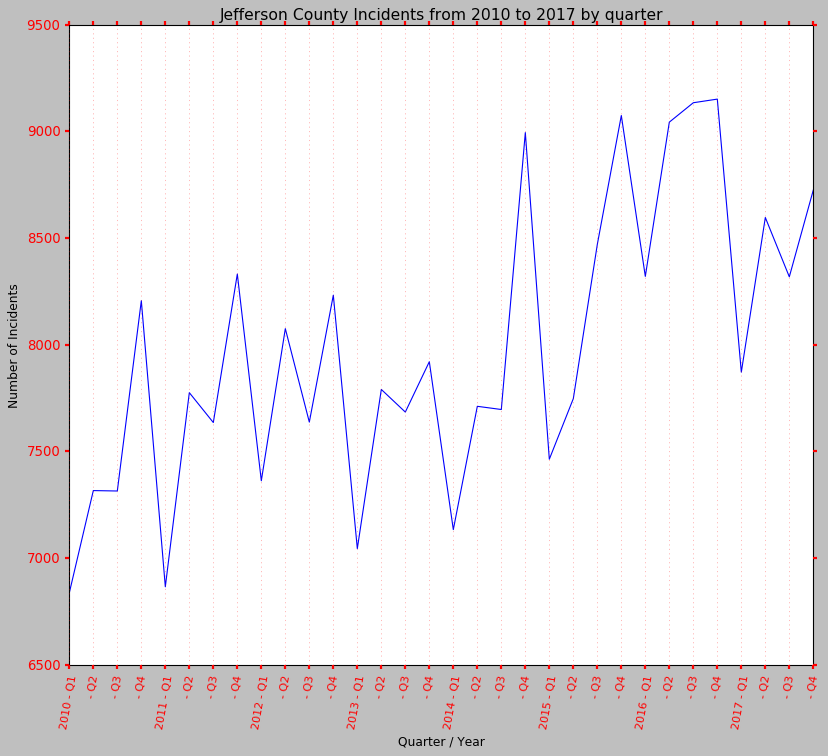

In [18]:
plt.figure(figsize=(12, 9))
plt.style.use('classic')

fig = plt.figure(figsize=(12, 10))

plt.title('Jefferson County Incidents from 2010 to 2017 by quarter', fontsize=14)
plt.xlabel('Quarter / Year', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11)

plt.grid(b=None, which='major', axis='x')

plt.xticks(np.arange(len(x_labels)), x_labels, rotation=80, fontsize=10)

plt.tick_params(direction='out', length=4, width=2, colors='r',
               grid_color='r', grid_alpha=0.5)

plt.plot(traffic_incidents)

fig.savefig('./flask/static/img/jefferson_incidents.png')
plt.show()